In [3]:
import pandas as pd
import numpy as np
from matplotlib.pylab  import rcParams
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

Cargar datos

In [5]:
#cargando datos
df_wine = pd.read_csv("winequality-red.csv")
df_wine.describe() #resumen del conjunto de datos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

histograma de la variable quality

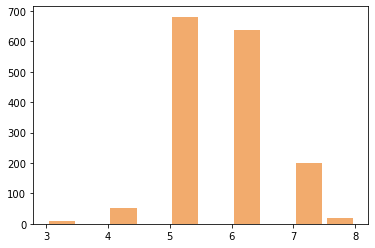

In [7]:
plt.hist (x=df_wine["quality"] , color= "#F2AB6D" , rwidth = 0.85)
plt.show()

se observa que la variable objetivo posee diferentes categorias, convertimos esta variable a una salida binaria. Si quality > 6 es igual a buena_calidad(1) , caso contrario igual a mala calidad(0)

In [3]:
df_wine["calidad"] = [1 if x >= 6 else 0 for x in df_wine ["quality"]]
#dividimos el conjunto de datos en (X) variables de caracteristicas y (Y) variable objeto
X = df_wine.drop(["quality" , "calidad"] , axis= 1)
Y =df_wine["calidad"]

NameError: name 'df_wine' is not defined

In [12]:
df_wine["calidad"].value_counts()

1    855
0    744
Name: calidad, dtype: int64

Modelo arbol de clasificacion

Determinar el conjunto de modelizacion y el de validacion

In [14]:
from sklearn.preprocessing import StandardScaler
X_carac_= X
X = StandardScaler().fit_transform(X)

entrenamiento y evaluacion del modelo

In [20]:
#dividir conjunto train/test
x_train,x_test , y_train , y_test = train_test_split(X ,Y ,train_size = 0.8 , random_state = 0)

In [23]:
#entrenar el modelo
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state = 1)
modelo.fit(x_train,y_train)
predicciones = modelo.predict(X= x_test,)
print(classification_report(y_test , predicciones))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       148
           1       0.82      0.72      0.77       172

    accuracy                           0.76       320
   macro avg       0.77      0.77      0.76       320
weighted avg       0.77      0.76      0.76       320



Metricas

Cross-validation
La tecnica de validacion cruzada nos ayuda a medir el comportamiento de los modelos que creamos y nos ayudara a encontrar un mejor modelo rapidamente

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)#numero de iteraciones

puntuaciones = cross_val_score(modelo,x_train , y_train , cv = kf , scoring = "accuracy")
print ("Metricas Cross_validation" , puntuaciones)

Metricas Cross_validation [0.734375   0.6953125  0.73828125 0.7265625  0.72156863]


Matriz de confusion

1.- Metrica de evaluacion de los errores de un clasificador
2.- Es una tabla que organiza las predicciones en funcion de los valores reales de los datos

In [27]:
from sklearn.metrics import confusion_matrix

print("Matriz de confusion")
print("-------------------")
confusion_matrix( y_true = y_test , y_pred = predicciones)

Matriz de confusion
-------------------


array([[120,  28],
       [ 48, 124]], dtype=int64)

Presicion vs accuracy

presicion .- capacidad de un instrumento de dar el mismo resultado en mediciones diferentes realizadas en las mismas condificones

accuracy.- es una medida de sesgo estadistico o errores sistematicos

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [30]:
accuracy = accuracy_score( y_true = y_test , y_pred = predicciones, normalize = True)
print(f"el accuracy de test es :  {100*accuracy} %")

el accuracy de test es :  76.25 %


In [32]:
#precision tp / (tp + fp)
precision = precision_score (y_test,predicciones)
print(f"la precision de test es :  {100*precision} %")

la precision de test es :  81.57894736842105 %


Curvas ROC/AUC

mide el rendimiento respecto a los falsos positivos (FP) y verdaderos positivos(TP)
El area bajo la curva (AUC) que permite caracterizar el rendimiento del modelo de claisificacion.

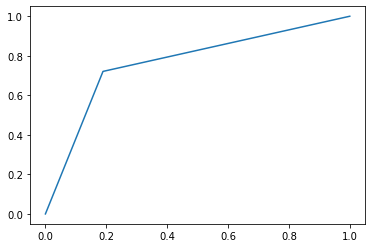

AUC 0.23412947831552489


In [33]:
fpr ,tpr , thresholds = metrics.roc_curve (y_test, predicciones,pos_label= 0 )

#print ROC Curve
plt.plot (tpr,fpr)
plt.show()

#print AUC
auc = np.trapz(tpr,fpr)
print("AUC" , auc)